# Case Study on ANOVA

### Problem Statement
XYZ Company has offices in four different zones. The company wishes to
investigate the following :

1. The mean sales generated by each zone.
2. Total sales generated by all the zones for each month.
3. Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.


#### Importing Dependancies and Loading Dataset

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import scipy
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Sales_data_zone_wise.csv')

In [3]:
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [4]:
df.shape

(29, 5)

In [5]:
df.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


### 1.The mean sales generated by each zone.

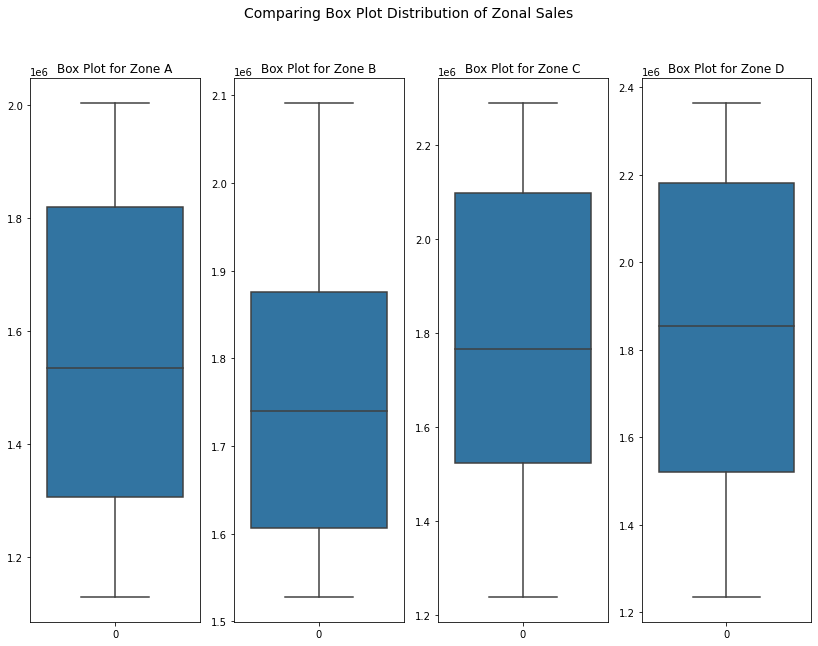

In [19]:
#Comparing distribution of sales generated by different zones
fig, axes = plt.subplots(1,4,figsize=(14,10))
fig.suptitle('Comparing Box Plot Distribution of Zonal Sales',fontsize = 14)
axes[0].set_title('Box Plot for Zone A')
axes[1].set_title('Box Plot for Zone B')
axes[2].set_title('Box Plot for Zone C')
axes[3].set_title('Box Plot for Zone D')
sns.boxplot(ax = axes[0], data = df['Zone - A'])
sns.boxplot(ax = axes[1], data = df['Zone - B'])
sns.boxplot(ax = axes[2], data = df['Zone - C'])
sns.boxplot(ax = axes[3], data = df['Zone - D'])
plt.show()

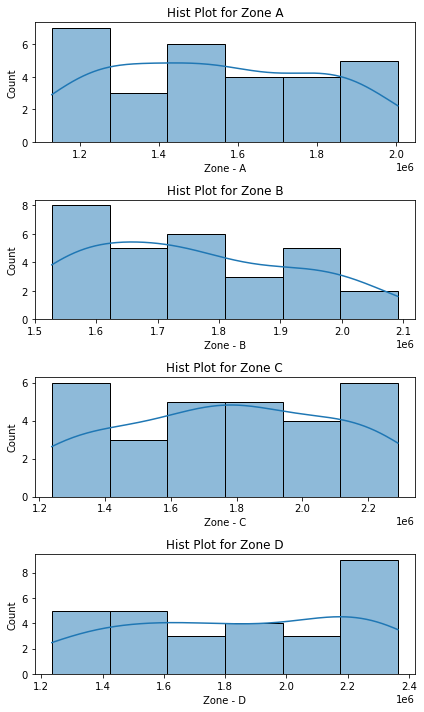

In [27]:
fig, axes = plt.subplots(4,1,figsize=(6,10))

axes[0].set_title('Hist Plot for Zone A')
axes[1].set_title('Hist Plot for Zone B')
axes[2].set_title('Hist Plot for Zone C')
axes[3].set_title('Hist Plot for Zone D')

sns.histplot(ax = axes[0], data = df['Zone - A'], kde=True)
sns.histplot(ax = axes[1], data = df['Zone - B'], kde=True)
sns.histplot(ax = axes[2], data = df['Zone - C'], kde=True)
sns.histplot(ax = axes[3], data = df['Zone - D'], kde=True)
plt.tight_layout()
plt.show()

In [8]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [28]:
df['Zone - A'].mean()

1540493.1379310344

In [29]:
df['Zone - A'].std()

261940.06186513143

In [11]:
df['Zone - B'].mean()

1755559.5862068965

In [31]:
df['Zone - B'].std()

168389.8858959081

In [12]:
df['Zone - C'].mean()

1772871.0344827587

In [32]:
df['Zone - C'].std()

333193.7245286123

In [14]:
df['Zone - D'].mean()

1842926.7586206896

In [33]:
df['Zone - D'].std()

375016.479487012

In [17]:
df.mean(axis=0).to_frame()

,0
Zone - A,1.540493e+06
Zone - B,1.755560e+06
Zone - C,1.772871e+06
Zone - D,1.842927e+06


**Findings:**
* Mean value for Sales by Zone A is 1540493.13
* Zone B has a mean sales values of 1755559.58 while Zone C has 1772871. (The sales mean for these regions are similar)
* Zone D exhibits the largest values for sales mean with 1842926.75.
* Zone D has the largest std dev with 375016.47 while Zone B has the least std dev of 168389.88.


### 2.Total sales generated by all the zones for each month.

In [34]:
df.head(3)

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600


In [41]:
#adding the zone-wise sales in each row and placing in new column 'sales total'
df['Sales Total'] = (df['Zone - A'] + df['Zone - B'] + df['Zone - C'] + df['Zone - D'])

In [42]:
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Sales Total
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [60]:
df['Sales Total'].mean()

6911850.517241379

In [61]:
df['Sales Total'].quantile(0.75)

7155515.0

In [53]:
df['Sales Total'].idxmax()

3

In [58]:
df.loc[3].to_frame()

,3
Month,Month - 4
Zone - A,1871571
Zone - B,1759617
Zone - C,2290580
Zone - D,2252681
Sales Total,8174449


In [54]:
df['Sales Total'].idxmin()

12

In [59]:
df.loc[12].to_frame()

,12
Month,Month - 13
Zone - A,1254939
Zone - B,1588473
Zone - C,1348629
Zone - D,1733383
Sales Total,5925424


In [44]:
df.corr()

,Zone - A,Zone - B,Zone - C,Zone - D,Sales Total
Zone - A,1.000000,0.399555,-0.274219,0.114302,0.475075
Zone - B,0.399555,1.000000,-0.442870,-0.452499,-0.074814
Zone - C,-0.274219,-0.442870,1.000000,0.390299,0.563823
Zone - D,0.114302,-0.452499,0.390299,1.000000,0.776463
Sales Total,0.475075,-0.074814,0.563823,0.776463,1.000000


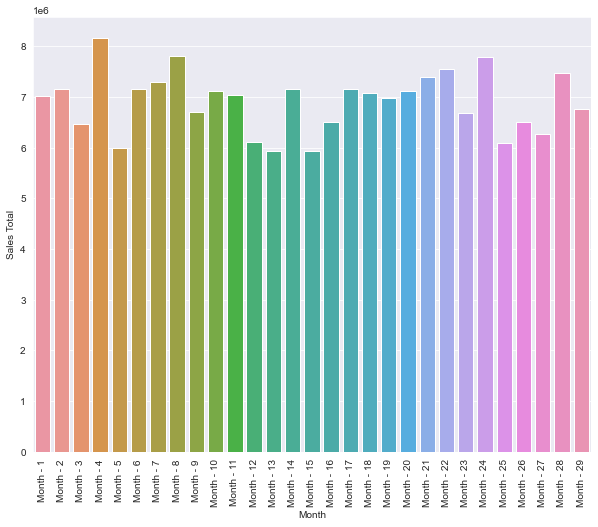

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='Sales Total', data = df)
plt.xticks(rotation=90)
plt.show()

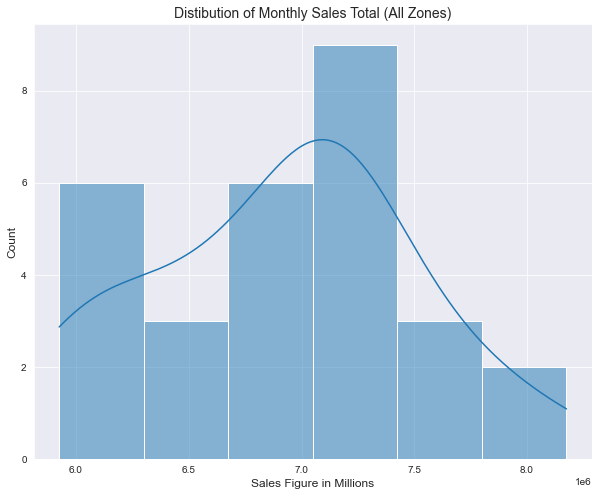

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.histplot(df['Sales Total'], kde=True)
plt.title("Distibution of Monthly Sales Total (All Zones)",fontsize=14)
plt.xlabel('Sales Figure in Millions',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.show()

**Findings:**
* The mean values of Sales Total for each month lies at 6911850.51.
* The Sales Total distribution is almost normal with the two tails being different.
* 75% of the Monthly Sales Total lies below 7155515.0 (75th Percentile)
* The Maximum Monthly Sales was generated in the 3rd month with a figure of 8174449. It is the only Sales Figure above 8 Million mark.
* Minimum sales was generated in 12th Month with a figure of 5925424.
* Zone D contributes significantly to the Sales every month.

### 3. Check whether all the zones generate the same amount of sales.

In [176]:
#creating a pivot dataframe to generate zone-wise sales figures 
pivot = pd.concat([df['Zone - A'], df['Zone - B'],df['Zone - C'],df['Zone - D']], axis=0,ignore_index=True).to_frame()

In [106]:
pivot

,0
0,1483525
1,1238428
2,1860771
3,1871571
4,1244922
...,...
111,1695122
112,1520406
113,1289160
114,2178267


In [108]:
pivot.rename(columns={0:'Sales'},inplace=True)
pivot

,Sales
0,1483525
1,1238428
2,1860771
3,1871571
4,1244922
...,...
111,1695122
112,1520406
113,1289160
114,2178267


In [109]:
pivot.reset_index()

,index,Sales
0,0,1483525
1,1,1238428
2,2,1860771
3,3,1871571
4,4,1244922
...,...,...
111,111,1695122
112,112,1520406
113,113,1289160
114,114,2178267


In [178]:
pivot['Zones'] = pivot.index

In [182]:
#re-assigning the column values according counts of zones 
pivot['Zones'].loc[:28] = 'Zone A'
pivot['Zones'].loc[29:57] = 'Zone B'
pivot['Zones'].loc[58:86] = 'Zone C'
pivot['Zones'].loc[87:116] = 'Zone D'

In [157]:
pivot.groupby('Zones')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Zones,,,,,,,,
Zone A,29.0,1.540493e+06,261940.061865,1128185.0,1305972.0,1534390.0,1820196.0,2004480.0
Zone B,29.0,1.755560e+06,168389.885896,1527574.0,1606010.0,1740365.0,1875658.0,2091194.0
Zone C,29.0,1.772871e+06,333193.724529,1237722.0,1523308.0,1767047.0,2098463.0,2290580.0
Zone D,29.0,1.842927e+06,375016.479487,1234311.0,1520406.0,1854412.0,2180416.0,2364132.0


Text(0.5, 1.0, 'Zonal Distribution of Sales')

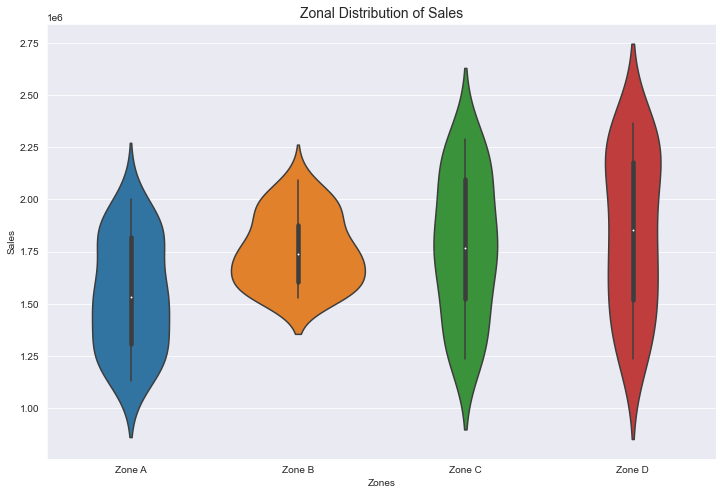

In [166]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Zones', y='Sales',data=pivot)
plt.title("Zonal Distribution of Sales", fontsize=14)

**Findings:**
* From a high-level analysis of the summary stats and stats plots, we see that the distribution of Zone-wise Sales have different distribution.
* From the violin plot and summary, we see that Zone C and Zone D share the most similarity in the distribution.
* However, Zone A and Zone B are very different between themselves and from Zone C and D as well.

### Testing of ANOVA

If all the zones generate the same amount of sales, then it is obvious that they have the same means.
* H0: Mean value of Sales in all Zones are same
---
If all the zones doesn't generate the same amount of sales, then all of them or atleast one of them will differ from others in their mean.
* H1: Mean value of Sales are different for the Zones

Significance Level = 5%

This qualifies for a 'One Way Anova Test' here.

In [167]:
from scipy.stats import f_oneway

In [169]:
zoneA = df['Zone - A']
zoneB = df['Zone - B']
zoneC = df['Zone - C']
zoneD = df['Zone - D']

In [173]:
#comparing the distribution of each zone 
f_val, p_val = f_oneway(zoneA,zoneB,zoneC,zoneD)

print('F_Statistic Value is',f_val)
print('\nP Value is',p_val)

if(p_val <= 0.05):
    print("\nThe p_value is less than significant value. Hence we reject the Null Hypothesis")
    print("All zones generate the same amount of sales.")
    
else:
    print("\nWe accept null hypothesis")
    print("All zones doesn't generate the same amount of sales. All or atleast one of them differs from others.")

F_Statistic Value is 5.672056106843581

P Value is 0.0011827601694503335

The p_value is less than significant value. Hence we reject the Null Hypothesis
All zones generate the same amount of sales.


**Findings:**
* p_value is less than the significant value. Hence, we reject the Null Hypothesis that the means are same.
* It is analysed that all zones doesn't generate the same amount of sales. All or atleast one of them differs from others.

In [174]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch

<h2><center> - END OF CASE STUDY 